# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
    #city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    time.sleep(1)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constantia
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | tsiombe
Processing Record 5 of Set 1 | lihue
Processing Record 6 of Set 1 | masterton
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | shimanovsk
Processing Record 10 of Set 1 | san antonio de pale
Processing Record 11 of Set 1 | iskateley
Processing Record 12 of Set 1 | katsuren-haebaru
Processing Record 13 of Set 1 | kavaratti
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | petropavlovsk-kamchatsky
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | grand falls-windsor
Processing Record 19 of Set 1 | mahdia
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | bilibino
Processing Reco

Processing Record 40 of Set 4 | lodwar
Processing Record 41 of Set 4 | whitehorse
Processing Record 42 of Set 4 | castillos
Processing Record 43 of Set 4 | fale old settlement
Processing Record 44 of Set 4 | aghajari
Processing Record 45 of Set 4 | mora
Processing Record 46 of Set 4 | road town
Processing Record 47 of Set 4 | den burg
Processing Record 48 of Set 4 | ola
Processing Record 49 of Set 4 | kralendijk
Processing Record 0 of Set 5 | bayanaul
Processing Record 1 of Set 5 | st. john's
Processing Record 2 of Set 5 | port pirie
Processing Record 3 of Set 5 | grande prairie
Processing Record 4 of Set 5 | nadym
Processing Record 5 of Set 5 | uturoa
Processing Record 6 of Set 5 | new norfolk
Processing Record 7 of Set 5 | quellon
Processing Record 8 of Set 5 | kapuskasing
Processing Record 9 of Set 5 | masallatah
Processing Record 10 of Set 5 | panama city beach
Processing Record 11 of Set 5 | caluula
Processing Record 12 of Set 5 | las tablas
Processing Record 13 of Set 5 | carutap

Processing Record 33 of Set 8 | port lincoln
Processing Record 34 of Set 8 | port douglas
Processing Record 35 of Set 8 | alexandria
Processing Record 36 of Set 8 | magong
Processing Record 37 of Set 8 | saint-joseph
Processing Record 38 of Set 8 | columbus
Processing Record 39 of Set 8 | jean-rabel
Processing Record 40 of Set 8 | razole
Processing Record 41 of Set 8 | saham
Processing Record 42 of Set 8 | sambava
Processing Record 43 of Set 8 | dabwali
Processing Record 44 of Set 8 | karamay
City not found. Skipping...
Processing Record 45 of Set 8 | shixing
Processing Record 46 of Set 8 | ust-tsilma
Processing Record 47 of Set 8 | pacora
Processing Record 48 of Set 8 | salalah
Processing Record 49 of Set 8 | baruun-urt
Processing Record 0 of Set 9 | kokopo
Processing Record 1 of Set 9 | aras-asan
Processing Record 2 of Set 9 | codrington
Processing Record 3 of Set 9 | melo
Processing Record 4 of Set 9 | katabu
Processing Record 5 of Set 9 | qamdo
Processing Record 6 of Set 9 | caraua

Processing Record 24 of Set 12 | ilhabela
Processing Record 25 of Set 12 | meadow lake
Processing Record 26 of Set 12 | vordingborg
Processing Record 27 of Set 12 | formosa do rio preto
Processing Record 28 of Set 12 | tagiura
Processing Record 29 of Set 12 | peace river
Processing Record 30 of Set 12 | tupiza
Processing Record 31 of Set 12 | aral
Processing Record 32 of Set 12 | cidreira
Processing Record 33 of Set 12 | kiunga
Processing Record 34 of Set 12 | dunyapur
Processing Record 35 of Set 12 | vuktyl
Processing Record 36 of Set 12 | tobarra
Processing Record 37 of Set 12 | sinabang
Processing Record 38 of Set 12 | igrim
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constantia,44.1833,28.6500,21.50,81,11,1.33,RO,1692927851
1,port-aux-francais,-49.3500,70.2167,5.78,89,100,18.62,TF,1692927852
2,albany,42.6001,-73.9662,17.99,94,100,0.89,US,1692927853
3,tsiombe,-25.3000,45.4833,18.26,95,7,2.55,MG,1692927855
4,lihue,21.9789,-159.3672,30.77,64,40,6.69,US,1692927856
...,...,...,...,...,...,...,...,...,...
566,dunyapur,29.7995,71.7196,29.15,59,59,4.50,PK,1692928601
567,vuktyl,63.8567,57.3094,8.02,97,100,4.62,RU,1692928602
568,tobarra,38.5921,-1.6919,23.32,52,0,0.98,ES,1692928603
569,sinabang,2.4803,96.3801,27.25,79,76,0.48,ID,1692928605


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constantia,44.1833,28.6500,21.50,81,11,1.33,RO,1692927851
1,port-aux-francais,-49.3500,70.2167,5.78,89,100,18.62,TF,1692927852
2,albany,42.6001,-73.9662,17.99,94,100,0.89,US,1692927853
3,tsiombe,-25.3000,45.4833,18.26,95,7,2.55,MG,1692927855
4,lihue,21.9789,-159.3672,30.77,64,40,6.69,US,1692927856


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [6]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

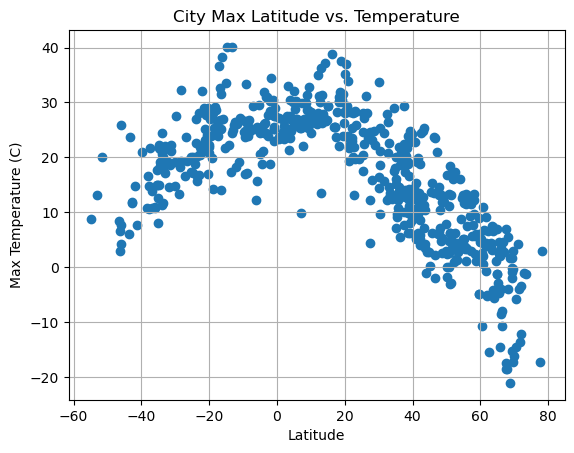

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

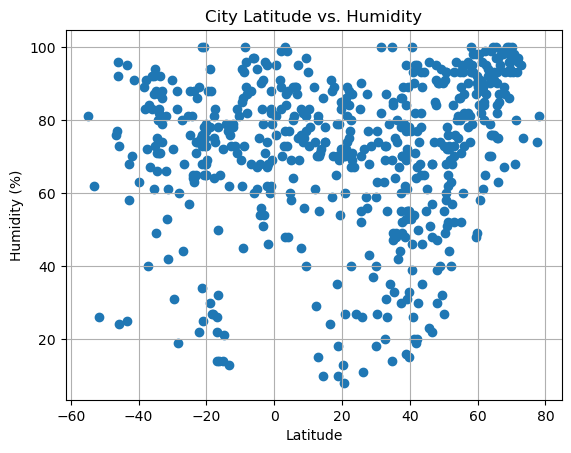

In [8]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

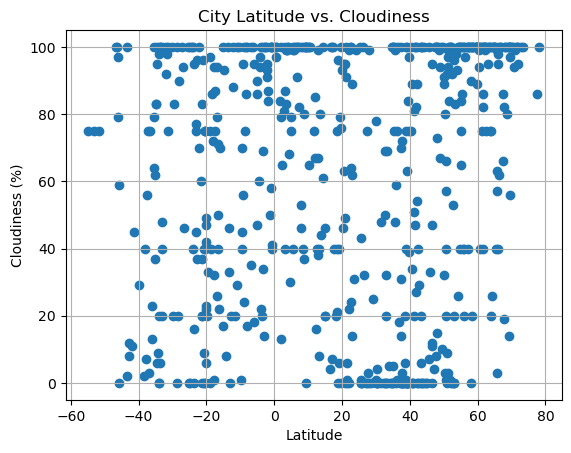

In [9]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

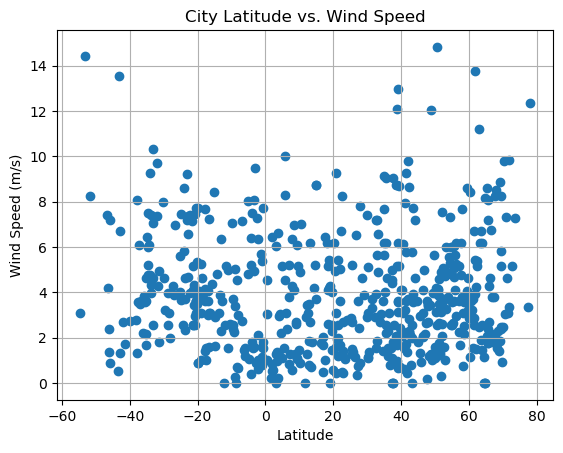

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [11]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8462548186825364


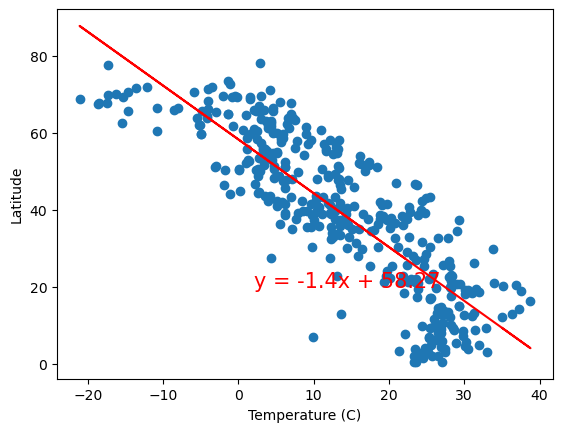

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Max Temp']
y_values = northern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,20),fontsize=15,color="red")
plt.xlabel('Temperature (C)')
plt.ylabel('Latitude')
plt.show()

The r-value is: 0.6419546065421801


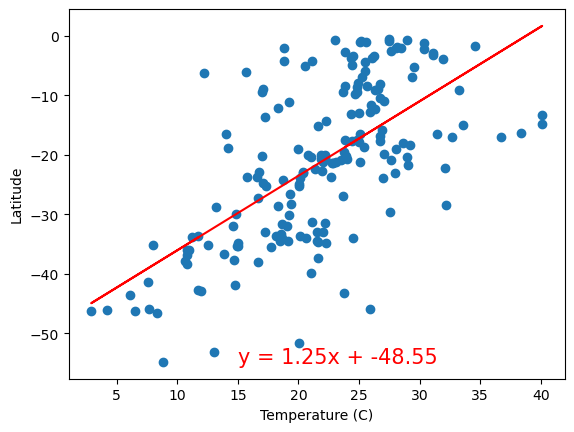

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Max Temp']
y_values = southern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,-55),fontsize=15,color="red")
plt.xlabel('Temperature (C)')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2385317912939407


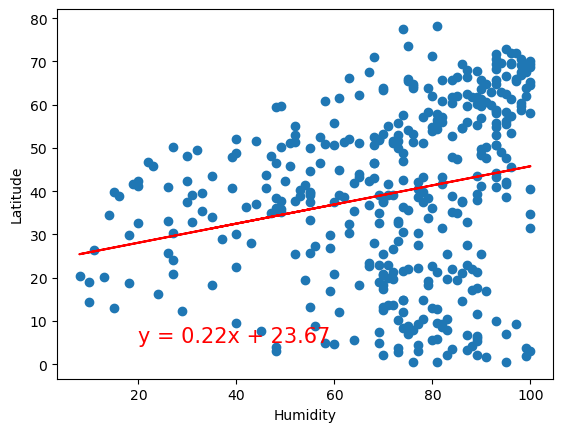

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

The r-value is: 0.016759316950056818


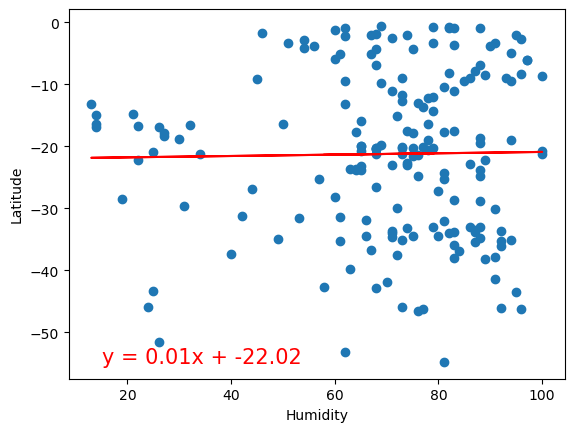

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,-55),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.155004893876971


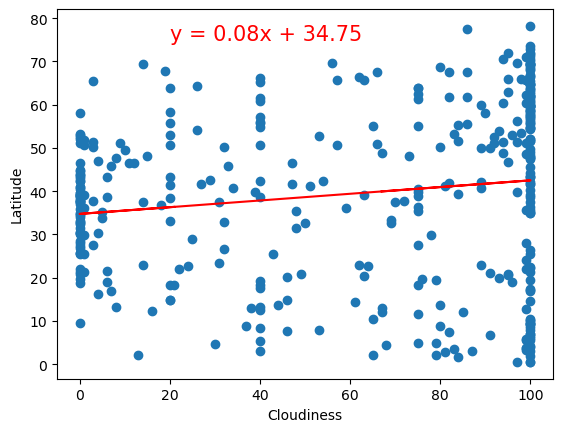

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Cloudiness']
y_values = northern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,75),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

The r-value is: 0.14341322916643243


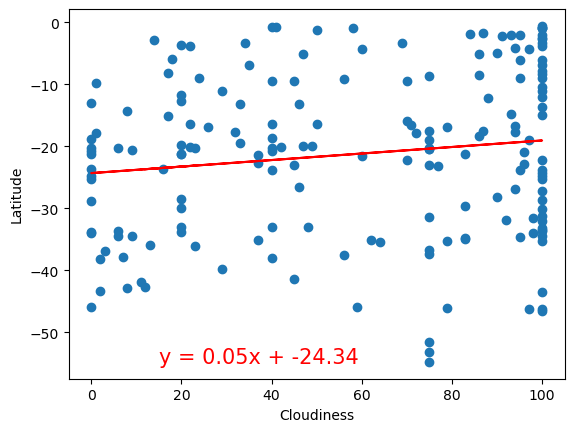

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Cloudiness']
y_values = southern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,-55),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17434667290903338


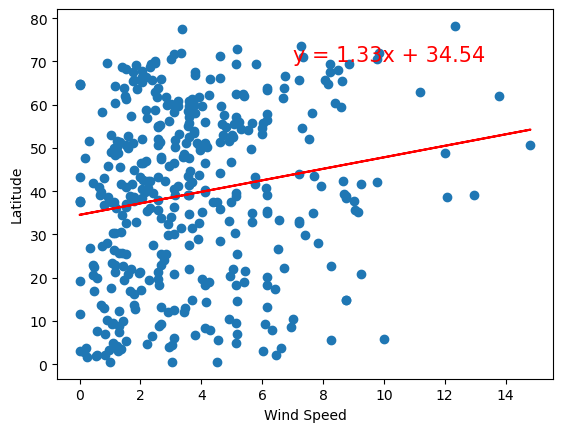

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Wind Speed']
y_values = northern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,70),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

The r-value is: -0.24947753546264592


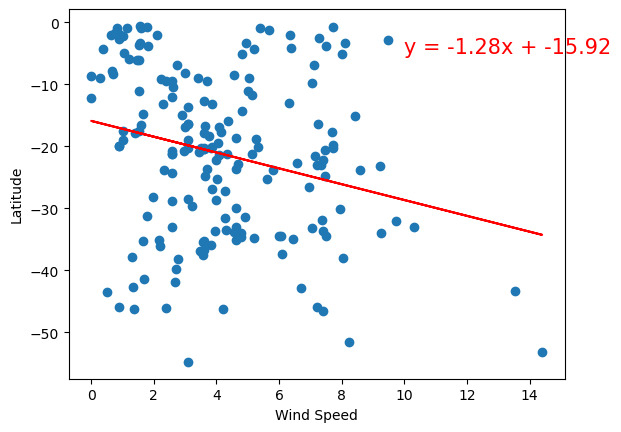

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-5),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:

# The available data does not provide enough evidence to firmly establish a strong connection between latitude and cloudiness, wind speed, or humidity. However, the data does seem to suggest a notable correlation between latitude and temperature.

SyntaxError: unterminated string literal (detected at line 1) (3706434216.py, line 1)